In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("car_price_dataset.csv")
df

,Engine_L,Horsepower,Mileage_km,Age_years,Doors,Price_USD
0,2.50,417,178714,12,4,27118.0
1,4.80,300,20151,6,2,47140.0
2,3.93,259,187479,3,4,34512.0
3,3.39,294,71690,12,5,31242.0
4,1.62,454,9499,19,3,28395.0
...,...,...,...,...,...,...
115,4.49,106,59748,2,3,36498.0
116,4.21,229,10801,16,2,35406.0
117,1.75,78,155262,7,3,10076.0
118,4.57,302,185761,9,4,34612.0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [16]:
X = df.drop('Price_USD', axis=1)
y = df['Price_USD']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', round(mse,2))
print('R_2 Score: ', round(r2, 3))

MSE: 4298387.91
R_2 Score:  0.963


Text(0.5, 1.0, 'Actual cs Predicted Car Prices')

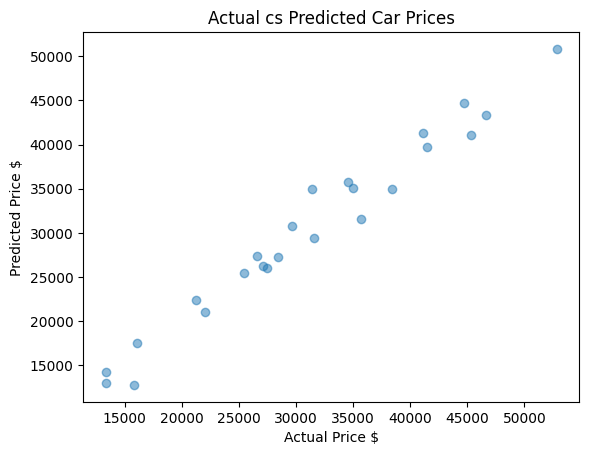

In [26]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price $')
plt.ylabel('Predicted Price $')
plt.title('Actual cs Predicted Car Prices')